In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\M.Srimanth\ Janani Sales Data\Corrected_janai_sales_data.csv")

In [3]:
df.head()

,SNo,Date,Account Name,Amount,Voucher No,Customer Name
0,2,01/05/2024,CASH,664.0,3545,MED MANNA
1,3,13/05/2024,POS Billing,1850.0,REG1174,MED MANNA
2,4,20/05/2024,POS Billing,54.0,REG1275,MED MANNA
3,5,24/06/2024,POS Billing,4248.0,REG1764,MED MANNA
4,6,01/07/2024,POS Billing,1751.0,REG1879,MED MANNA


# Total Revenue Gaind

In [4]:
df['Amount'].sum().round(2)

8986169.65

# Customers Name

In [5]:
df['Customer Name'].unique()

array(['MED  MANNA', 'MED SAFA', 'OTT ANNAI STORE ', 'SEM SUBBAIYA',
       'STP AMBIKA', 'STP JJ STORE', 'STP VIJAYA', 'ECR DK', 'KAM UMA',
       'TPK RAJ', 'SEM DRK', 'SEM SRI MURUGAN', 'SEM ASP', 'SEM ZAM ZAM',
       'SEM AYYANAR', 'PKN HARISH', 'SEM MAHALAKSHMI', 'MED SIVASAKTHI',
       'KAM SANKAR', 'MED MURUGAN', 'STP ARULMOZHI', 'STP LAKSHMI',
       'SEM SARAVANA(NEW)', 'KAM HARIJOTHI', 'TPK SM STORE',
       'TPK VAIRAVAN', 'ECR AMMAN', 'PKN RAJAPANDI', 'PKN TAMIL',
       'VEERARAJ', 'PKN MURUGAN', 'MED ANNAI', 'SEM JAYARAM',
       'SEM SENTHUR', 'MED VIJAYATHAZI', 'MED SAKTHI', 'PKN MAARIBALA',
       'PKN VEL STORE', 'TPK JEBHA', 'TPK MAARI', 'ECR OM SAKTHI',
       'ECR SEETHA LAKSHMI', 'SEM KISHORE', 'SEM SABARI KANISHKA',
       'SEM SAI BABA', 'NANDHA KUMAR', 'PKN CHETTIYAR',
       'PKN DHANALAKSHMI', 'PKN SANKAR', 'KAR KANAKA SUNDARI',
       'MED CHITHIRAKANI', 'STP GANESH', 'TPK ANUSIYA', 'TPK LAKSHMI',
       'SEM NARAYANAN', 'PKN DS STROE', 'PKN DURAI', 'PKN G

# Number of Customers

In [6]:
df['Customer Name'].nunique()

182

# Top 15 Customers by Total Amount

In [7]:
top_customers = df.groupby('Customer Name')['Amount'].sum().sort_values(ascending=False).head(15)
top_customers


Customer Name
STP KITTU           656627.0
SEM MUTHU           268169.0
SEM NARAYANAN       246946.0
SEM SAI BABA        214223.0
STP JJ STORE        208914.0
PKN HARI            166891.0
MED MARUTHI         134546.0
ECR BISMILLAH       130641.0
SEM MALAR           128210.0
SEM DHEEN STORE     126521.5
PKN DHANALAKSHMI    126259.0
SEM SARAVANA        116174.0
MED ANNAI           115252.0
STP POOJA           114757.0
SEM SABARI          113257.0
Name: Amount, dtype: float64

# Customers with the Highest Number of Transactions

In [8]:
frequent_customers = df['Customer Name'].value_counts().head(15)
frequent_customers


Customer Name
STP POOJA            37
SEM DHARSAN          36
SEM TIRUPATHI        36
SEM 23(BLOCK)        33
STP GANESH           33
MED ANNAI            33
SEM SARAVANA(NEW)    33
STP AMBIKA           32
ECR DK               32
PKN JAYAJOTHI        32
STP KITTU            32
SEM AADISH           32
MED SM               32
SEM DHEEN STORE      32
SEM SARAVANA         31
Name: count, dtype: int64

# Average Transaction Per Customers

In [9]:
avg_transaction = df.groupby('Customer Name')['Amount'].mean().round(2).sort_values(ascending=False)
avg_transaction


Customer Name
STP KITTU         20519.59
SEM NARAYANAN     17639.00
SEM GK STORE      15129.33
MED MAHARAJA      10669.50
PKN TAMIL          9085.33
                    ...   
VEERARAGAVAN        235.66
VEERARAJ            162.25
JAYA                156.00
LOC THIRU MILK      126.73
NANDHA KUMAR        104.00
Name: Amount, Length: 182, dtype: float64

# Total Amount Collected Per Month

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Check the converted column
print(df['Date'].head())


0   2024-05-01
1   2024-05-13
2   2024-05-20
3   2024-06-24
4   2024-07-01
Name: Date, dtype: datetime64[ns]


In [11]:
monthly_totals = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_totals

Date
2024-05    1190480.35
2024-06    1046923.45
2024-07    1130988.80
2024-08    1185277.00
2024-09    1667446.90
2024-10    1276987.25
2024-11    1096551.90
2024-12     391514.00
Freq: M, Name: Amount, dtype: float64

# Average Amount Collected Per Month

In [12]:
monthly_Avg = df.groupby(df['Date'].dt.to_period('M'))['Amount'].mean().round(2)

In [13]:
monthly_Avg

Date
2024-05    2582.39
2024-06    2457.57
2024-07    2416.64
2024-08    2628.11
2024-09    3850.92
2024-10    2825.19
2024-11    2586.21
2024-12    2776.70
Freq: M, Name: Amount, dtype: float64

# Top Spending Days: Identify the days with the highest total amounts

In [14]:
top_days = df.groupby('Date')['Amount'].sum().sort_values(ascending=False).head(15)
top_days

Date
2024-09-01    571430.0
2024-10-10    133476.5
2024-12-05    128305.0
2024-11-07    121950.5
2024-06-27    119477.5
2024-11-28    105976.0
2024-06-07    105600.0
2024-09-04    104889.5
2024-07-25    103047.5
2024-05-09    102577.0
2024-05-11    100242.1
2024-10-24     94470.5
2024-10-03     91582.0
2024-08-29     91370.0
2024-05-30     91023.0
Name: Amount, dtype: float64

# Weekly Trends: Analyze spending patterns over days of the week

In [15]:
df['DayOfWeek'] = df['Date'].dt.day_name()
weekly_trends = df.groupby('DayOfWeek')['Amount'].sum()
print(weekly_trends)

DayOfWeek
Friday        935663.90
Monday       1595984.40
Saturday     1213189.80
Sunday        580989.50
Thursday     2574466.75
Tuesday      1168079.05
Wednesday     917796.25
Name: Amount, dtype: float64


# 

In [16]:
max_transaction = df[df['Amount'] == df['Amount'].max()]
max_transaction

,SNo,Date,Account Name,Amount,Voucher No,Customer Name,DayOfWeek
2118,2120,2024-09-01,CASH,571430.0,9921,STP KITTU,Sunday


# Customers with Only One Transaction

In [17]:
single_transaction_customers = df['Customer Name'].value_counts().reset_index()
single_transaction_customers = single_transaction_customers[single_transaction_customers['count'] == 1]
print(single_transaction_customers)

          Customer Name  count
172  KAR KANAKA SUNDARI      1
173          PKN HARISH      1
174       OTT NAVEEN ST      1
175    OTT ANNAI STORE       1
176          STP KIRUBA      1
177         LOCAL MOHAN      1
178       PON JAYASUDHA      1
179             KAM UMA      1
180        NANDHA KUMAR      1
181         LOCAL ABRAN      1


In [18]:
single_transaction_df = df[df['Customer Name'].isin(single_transaction_customers['Customer Name'])] 

In [19]:
single_transaction_df[['Customer Name','Date','Amount','DayOfWeek']]

,Customer Name,Date,Amount,DayOfWeek
27,OTT ANNAI STORE,2024-05-01,1043.00,Wednesday
179,KAM UMA,2024-05-07,540.00,Tuesday
281,PKN HARISH,2024-05-11,3934.00,Saturday
847,NANDHA KUMAR,2024-06-21,104.00,Friday
909,KAR KANAKA SUNDARI,2024-06-24,850.00,Monday
1293,STP KIRUBA,2024-07-12,905.00,Friday
2451,LOCAL ABRAN,2024-10-04,1306.25,Friday
2769,PON JAYASUDHA,2024-10-17,954.00,Thursday
2899,LOCAL MOHAN,2024-10-27,815.00,Sunday
3216,OTT NAVEEN ST,2024-12-09,832.00,Monday


# LOCATION IDENTIFICATION

In [67]:
df["Extracted"] = df["Customer Name"].str.extract(r'(^[A-Z]{3}\s)', expand=False)

In [68]:
df['Extracted'] = df['Extracted'].fillna('LOC ')

In [73]:
df['Extracted'] = df["Extracted"].str.replace(" ", "", regex=False)

In [74]:
# Number of Customber Based on Location
df.groupby('Extracted')['Customer Name'].nunique()

Extracted
ECR    24
KAM    12
KAR     2
LOC    12
MED    21
OTT     4
PKN    40
PON     2
SEM    34
STP    22
TPK     9
Name: Customer Name, dtype: int64

In [85]:
df['Location'] = df['Extracted'].apply(lambda x:
                                      'Chennai ECR' if x == 'ECR' else
                                      'KAMRAJ PURAM' if x == 'KAM' else
                                      'KARANI' if x == 'KAR' else
                                      'LOCAL' if x == 'LOC' else
                                      'MEDAVAKKAM' if x == 'MED' else
                                      'OTTIAMBAKKAM' if x == 'OTT' else
                                      'PONMAR' if x == 'PON' else
                                      'SETHALAPAKKAM' if x == 'STP' else
                                      'THORAIPAKKAM' if x == 'TPK' else
                                      'PALLIKARANAI' if x == 'PKN' else
                                      'SEMMENCHERRY' if x == 'SEM' else 
                                      'LOCAL')


In [86]:
df.groupby('Location')['Customer Name'].nunique()

Location
Chennai ECR      24
KAMRAJ PURAM     12
KARANI            2
LOCAL            12
MEDAVAKKAM       21
OTTIAMBAKKAM      4
PALLIKARANAI     40
PONMAR            2
SEMMENCHERRY     34
SETHALAPAKKAM    22
THORAIPAKKAM      9
Name: Customer Name, dtype: int64

# Visualization

In [22]:
import matplotlib.pyplot as plt

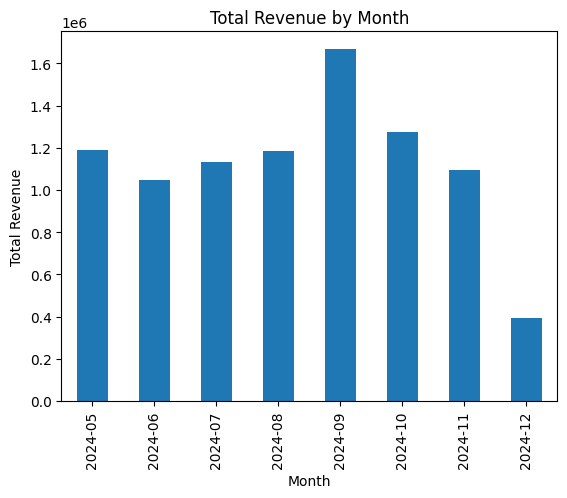

In [23]:
monthly_totals.plot(kind='bar', title='Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [87]:
df.to_csv()

',SNo,Date,Account Name,Amount,Voucher No,Customer Name,DayOfWeek,Extracted,Location\r\n0,2,2024-05-01, CASH,664.0,3545,MED  MANNA,Wednesday,MED,MEDAVAKKAM\r\n1,3,2024-05-13, POS Billing,1850.0,REG1174,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n2,4,2024-05-20, POS Billing,54.0,REG1275,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n3,5,2024-06-24, POS Billing,4248.0,REG1764,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n4,6,2024-07-01, POS Billing,1751.0,REG1879,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n5,7,2024-07-08, POS Billing,1128.0,REG1992,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n6,8,2024-07-30, POS Billing,2638.0,REG2300,MED  MANNA,Tuesday,MED,MEDAVAKKAM\r\n7,9,2024-09-23, POS Billing,2680.0,REG3101,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n8,10,2024-11-11, POS Billing,3945.0,REG3818,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n9,11,2024-12-02, POS Billing,1490.0,REG4107,MED  MANNA,Monday,MED,MEDAVAKKAM\r\n10,12,2024-05-01, CASH,900.0,3545,MED SAFA,Wednesday,MED,MEDAVAKKAM\r\n11,13,2024-05-06, POS Billing,528.0,REG1057,MED SAFA,Monda

In [89]:
df.to_csv('Corrected_janai_sales_data.csv', index=False)